In [3]:
%reset -f
%reload_ext autoreload
%autoreload 2
import os
import sys
import importlib
import numpy as np
import pandas as pd

# === Setup ===
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))

os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    from help_functions import dict_to_horizontal_df, get_df_from_file
    import help_functions
    import visualize
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e}")

# === Config ===
pd.set_option('display.max_columns', None)

# === Load molecular data ===
feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\new_feather'
# mols = Molecules(feather_path)



In [53]:
mols.visualize_molecules([0])

🔥 dipole vector: array([ -3.0938, -10.2555,   0.6619]) (scaled by 5)


In [70]:
answers_dict = {
    "Ring Vibration atoms - by order -> Pick primary atom and para to it: \n example: 13,17": [9, 8],
    "Stretch Threshold": [1600],
    "Stretching Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5": [],
    "Bend Threshold": [3000],
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7": [22, 23],
    "Center_Atoms Dipole": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane": [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2],[]],
    "Sub-Atoms NPA": [1, 3, 5, 11, 8, 12, 14, 4, 6] ,
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4": [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    "charges values - Insert atoms to show charge: \n example: 1,2,3,4": [1,2,3,4],
    "charge_diff - Insert atoms to show charge difference: \n example: 1,2 3,4": [[4, 6], [6, 4], [4, 3], [11, 6]],
    "Sterimol atoms - Primary axis along: \n example: 7,8": [[11, 12], [3, 11], [3, 12], [5, 11], [12, 14], [4, 12]],
    "Bond_length - Atom pairs to calculate difference: \n example: 1,2 4,5": [[11, 6], [6, 4], [1, 5], [11, 6]],
    'Bond_angle - Atom triplets to calculate difference: \n example: 1,2,3 4,5,6': [[11, 6, 4], [6, 4, 5], [1, 5, 4], [11, 6, 4]],
}
df=mols.get_molecules_comp_set_app(entry_widgets=answers_dict,answers_list=None)

[[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]] [1, 3, 5, 11, 8, 12, 14, 4, 6]
Available charge types: ['nbo', 'hirshfeld', 'cm5']
Columns in nbo charge: ['atom_1', 'atom_2', 'atom_3', 'atom_4']
Columns in hirshfeld charge: ['atom_1', 'atom_2', 'atom_3', 'atom_4']
Columns in cm5 charge: ['atom_1', 'atom_2', 'atom_3', 'atom_4']


In [71]:
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
df.to_csv('added_features_try342.csv', index=True)

Database already exists at: results_added_features.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['para_angle', 'loc_B5_1-5', 'cm5_atom_12', 'Frequency_Stretch_5_4', 'Cross_mag_Bending_22-23', 'total_dipole_10-11-12', 'bond_length_12-14', 'Amplitude_Stretch_5_4', 'loc_B5_19-18', 'L_11-6', 'B1_20-9', 'bite_angle', 'cross_angle', 'bite_angle_inverted', 'hirshfeld_atom_12', 'buried_volume', 'total_dipole_5-1-25', 'B1_11-6', 'dipole_x_10-11-12', 'B1_19-18']



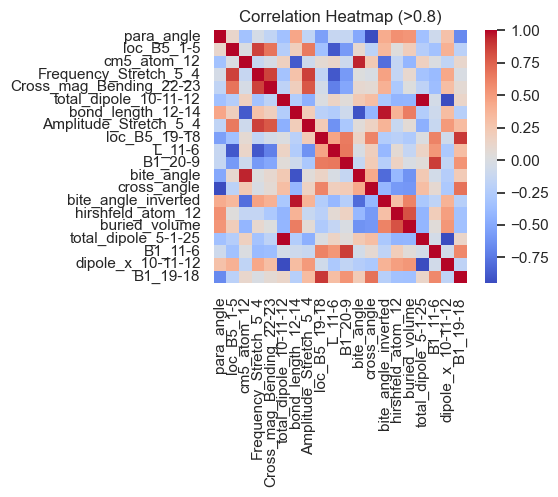


Correlated features were not dropped.

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Using single train/test split with test size 0.1 and random state 42
Index 0: Actual = 0.047, Predicted = 0.339, % Error = 615.72%
Index 1: Actual = 0.265, Predicted = 0.440, % Error = 66.25%
Index 2: Actual = 0.000, Predicted = 0.291, % Error = nan%
Index 3: Actual = 1.882, Predicted = 1.443, % Error = -23.31%
Index 4: Actual = 1.882, Predicted = 1.916, % Error = 1.81%
Index 5: Actual = 2.304, Predicted = 2.638, % Error = 14.46%
Index 6: Actual = 2.304, Predicted = 1.528, % Error = -33.70%
Index 7: Actual = 1.743, Predicted = 1.690, % Error = -3.09%
Index 8: Actual = 1.532, Predicted = 0.973, % Error = -36.47%
Index 9: Actual = 1.370, Predicted = 1.201, % Error = -12.31%
Index 10: Actual = 1.532, Predicted = 1.536, % Error = 0.31%
Index 11: Actual = 1.629, Predicted = 1.035, % Error = -36.50%
Index 12: Actual = 1.027, Predicted = 1.012, % Error = -1.44

C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:293: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


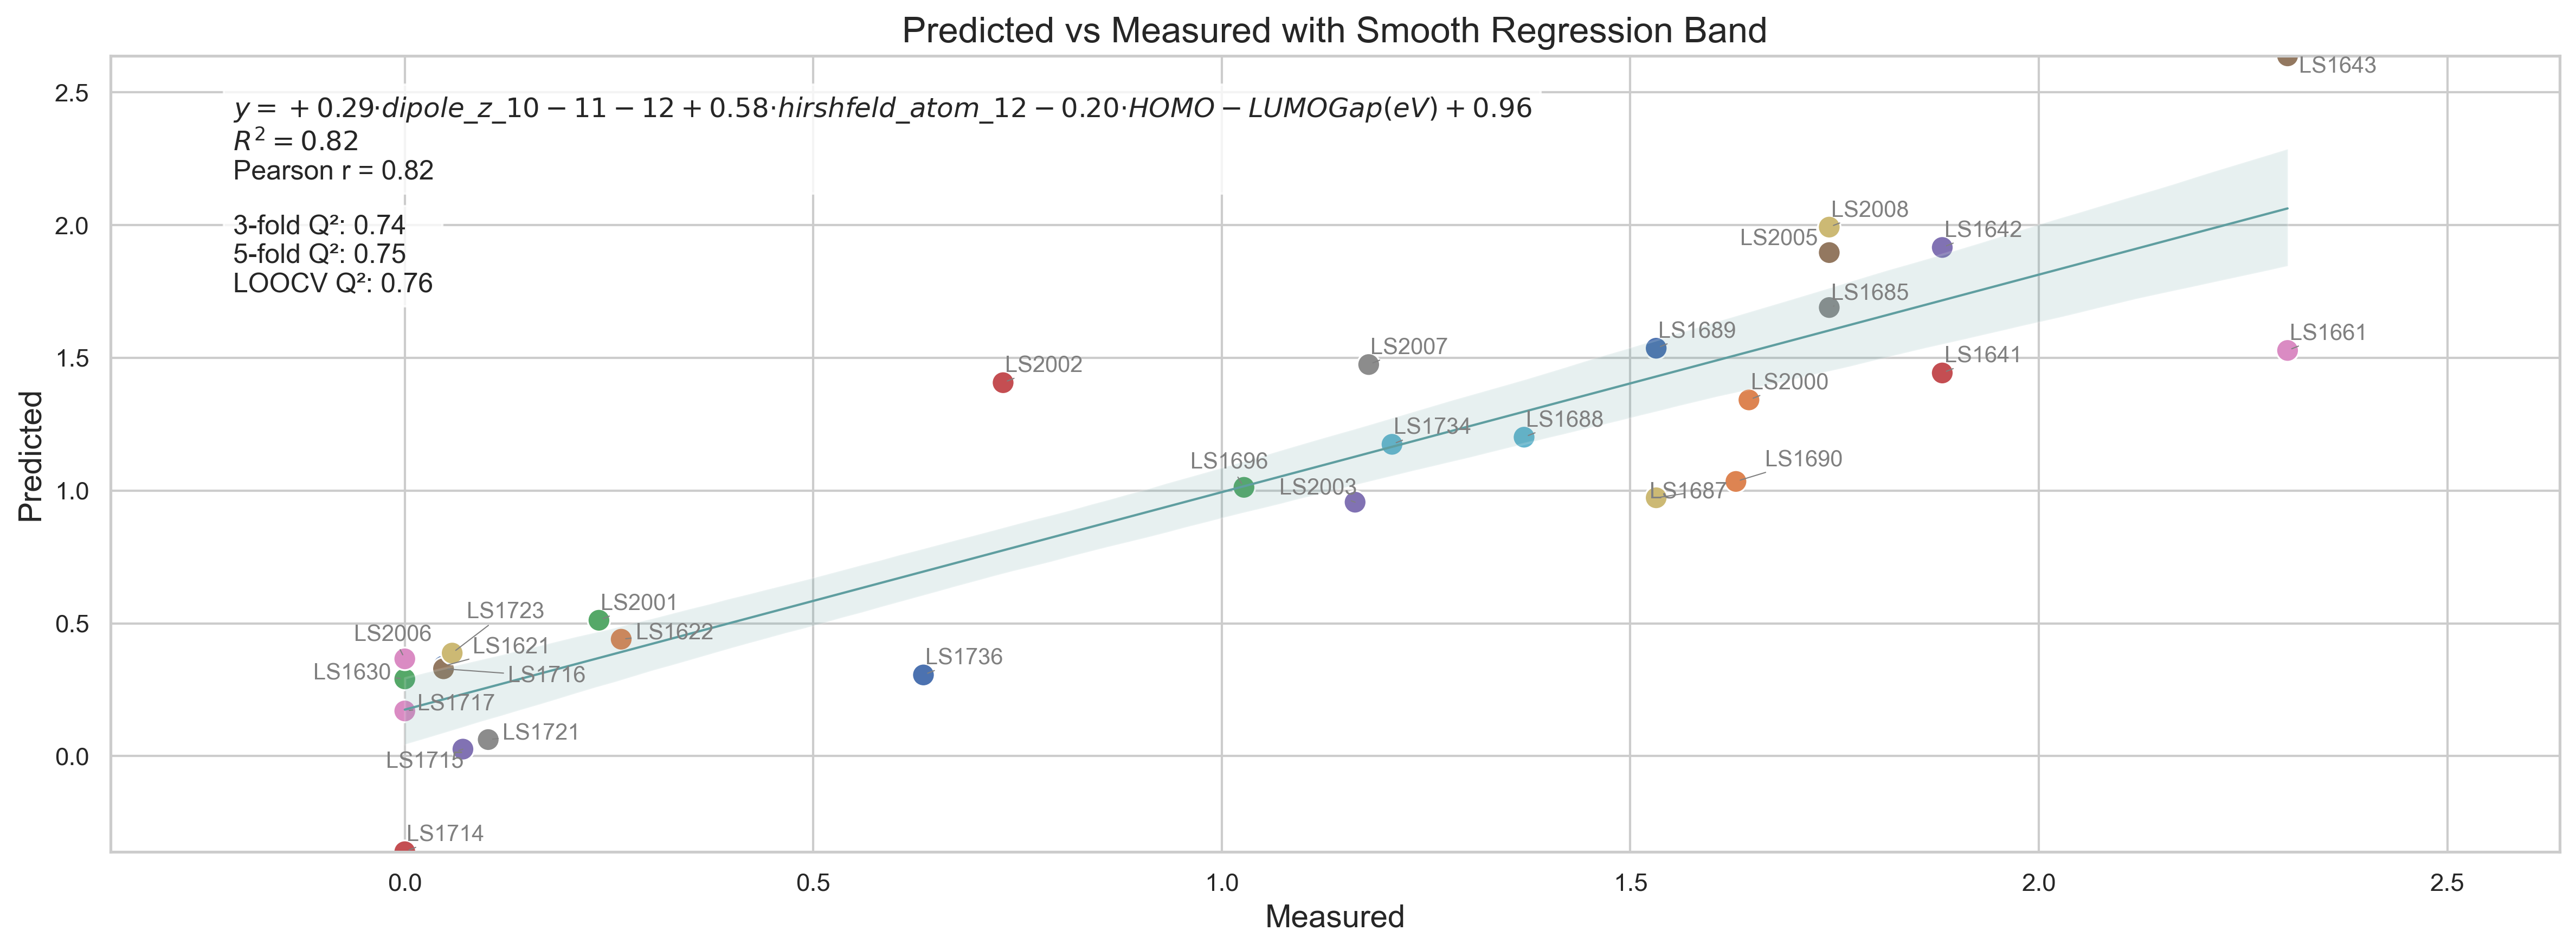

In [8]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv'

# csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\added_features_try34.csv'

csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
df=pd.read_csv(csv_path, index_col=0)

# df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

# pick 4 random samples to leave out
leave_out = np.random.choice(df.index, size=2, replace=False).tolist()
leave_out=['LS1726', 'LS2004', 'LS1695', 'LS1663'] # 

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=leave_out, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
# Regression_model.leave_out_samples(leave_out=leave_out, keep_only=True)
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
features=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']
# 0   LS1726  0.277339   0.215294   22.371802
# 1   LS2004  1.881808   0.715195   61.994283
# 2   LS1695  0.981880   0.120586   87.718864
# 3   LS1663  1.743479   0.100025   94.262930
r=['dipole_z_10-11-12', 'hirshfeld_atom_12', 'HOMO-LUMO Gap (eV)']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
# x=Regression_model.check_linear_regression_assumptions()
# Regression_model.fit_and_evaluate_combinations()
plot.generate_and_display_q2_scatter_plot(Regression_model,r)


In [ ]:
plot.univariate_threshold_analysis()

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Using single train/test split with test size 0.1 and random state 42
Index 0: Actual = 0.047, Predicted = 0.501, % Error = 957.91%
Index 1: Actual = 0.265, Predicted = 0.512, % Error = 93.49%
Index 2: Actual = 0.000, Predicted = 0.374, % Error = nan%
Index 3: Actual = 1.882, Predicted = 1.558, % Error = -17.20%
Index 4: Actual = 1.882, Predicted = 2.051, % Error = 8.97%
Index 5: Actual = 2.304, Predicted = 1.955, % Error = -15.18%
Index 6: Actual = 2.304, Predicted = 1.610, % Error = -30.16%
Index 7: Actual = 1.743, Predicted = 1.739, % Error = -0.25%
Index 8: Actual = 1.532, Predicted = 0.972, % Error = -36.52%
Index 9: Actual = 1.370, Predicted = 1.327, % Error = -3.13%
Index 10: Actual = 1.532, Predicted = 1.494, % Error = -2.45%
Index 11: Actual = 1.629, Predicted = 1.050, % Error = -35.53%
Index 12: Actual = 1.027, Predicted = 1.103, % Error = 7.40%
Index 13: Actual = 0.000, Predicted = 

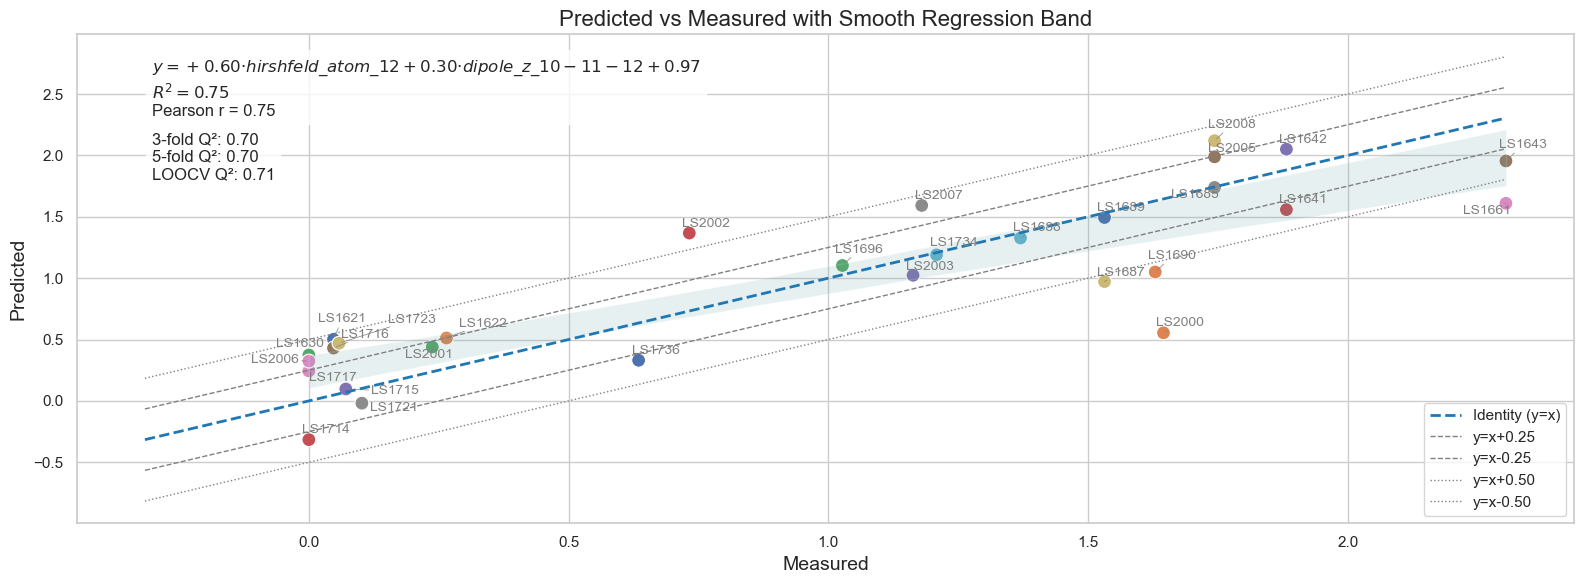

In [81]:
comb=['hirshfeld_atom_12','dipole_z_10-11-12']
plot.generate_and_display_q2_scatter_plot(Regression_model,comb)

In [86]:
features_df=Regression_model.features_df[['hirshfeld_atom_12','dipole_z_10-11-12']]

# plot.analyze_shap_values(Regression_model, features_df)

In [ ]:
def ddG_to_ee_and_class(ddg_values, temperature=298.15, threshold_ee=35, return_df=True):
    """
    Converts ΔΔG values (kcal/mol) to enantiomeric excess (%ee), then binarizes.

    Parameters
    ----------
    ddg_values : array-like
        ΔΔG values in kcal/mol.
    temperature : float, optional
        Temperature in Kelvin. Default is 298.15 K.
    threshold_ee : float, optional
        Threshold (in %ee) to binarize outcome. Default is 50% ee.
    return_df : bool, optional
        If True, returns DataFrame with ΔΔG, %ee, and binary label. Else, returns only labels.

    Returns
    -------
    pd.DataFrame or np.ndarray
        If return_df=True, DataFrame with columns: ΔΔG, %ee, Binary Class.
        If return_df=False, just the binary class labels.
    """
    R = 0.0019872041  # kcal/mol·K
    ddg_values = np.asarray(ddg_values).astype(float)

    # Compute enantiomeric excess using tanh form
    ee = np.tanh(-ddg_values / (2 * R * temperature)) * 100  # in %

    # Binary classification: is abs(%ee) >= threshold?
    threshold_ee = float(threshold_ee)
    binary_class = (np.abs(ee) >= threshold_ee)

    if return_df:
        return pd.DataFrame({
            'ΔΔG (kcal/mol)': ddg_values,
            'Predicted ee (%)': ee,
            'Binary Class': binary_class
        })
    else:
        return binary_class
target_vector = Regression_model.target_vector
ddg_df = ddG_to_ee_and_class(target_vector, temperature=298.15, threshold_ee=35, return_df=True)
print(ddg_df.head(15))
plot.univariate_threshold_analysis(features_df, ddg_df['Binary Class'])

    ΔΔG (kcal/mol)  Predicted ee (%)  Binary Class (>|35.0%|)
0         0.047395         -3.997579                    False
1         0.264865        -21.987104                    False
2         0.000000         -0.000000                    False
3         1.881808        -91.985198                     True
4         1.881808        -91.985198                     True
5         2.304448        -95.990746                     True
6         2.304448        -95.990746                     True
7         1.743479        -89.983037                     True
8         1.531646        -85.979580                     True
9         1.369963        -81.977024                     True
10        1.531646        -85.979580                     True
11        1.629255        -87.981180                     True
12        1.027102        -69.973189                     True
13        0.000000         -0.000000                    False
14        0.071141         -5.996373                    False


KeyError: 'Binary Class (>|35%|)'

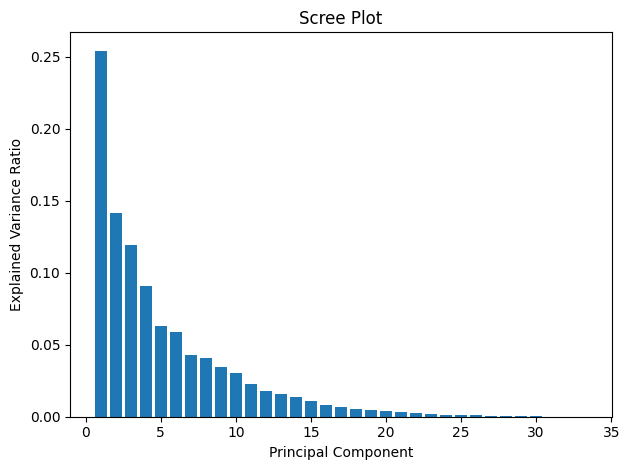

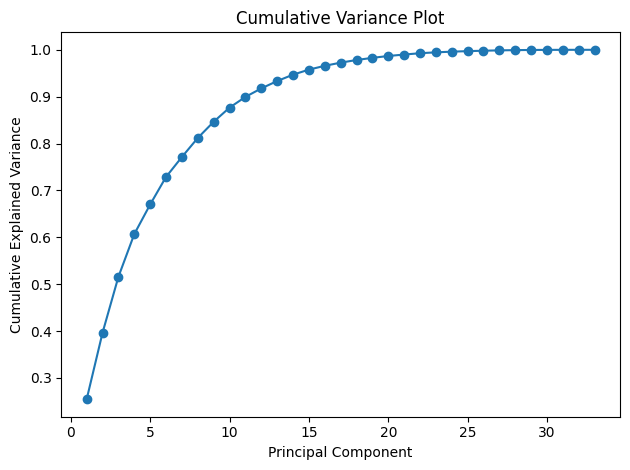

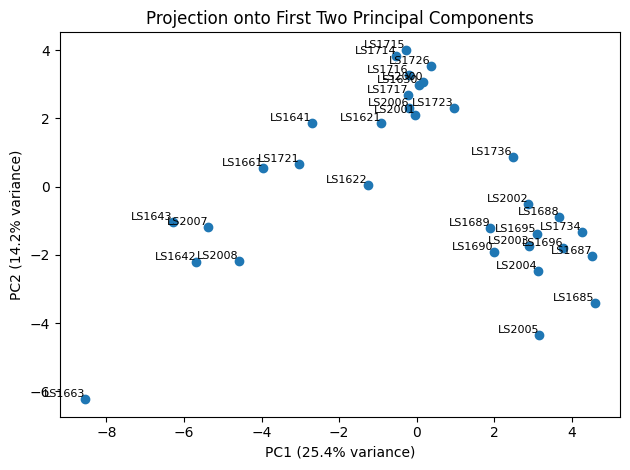

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
# Load the dataset
df = pd.read_csv(r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv')


# Extract sample identifiers (non-numeric first column)
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]

# Select only numeric columns (features and output)
numeric_df = df.select_dtypes(include=[np.number])

# Separate features by dropping the last numeric column (output)
features = numeric_df.iloc[:, :-1]
# save the output column
output = numeric_df.iloc[:, -1]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_ratio = pca.explained_variance_ratio_
pc1_var = explained_ratio[0] * 100
pc2_var = explained_ratio[1] * 100

# 1) Scree Plot
plt.figure()
plt.bar(range(1, len(explained_ratio) + 1), explained_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.tight_layout()

# 2) Cumulative Variance Plot
cum_ratio = explained_ratio.cumsum()
plt.figure()
plt.plot(range(1, len(cum_ratio) + 1), cum_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.tight_layout()

# 3) Scatter Plot of PC1 vs PC2 with variance and sample labels
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, name in enumerate(sample_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)')
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)')
plt.title('Projection onto First Two Principal Components')
plt.tight_layout()
plt.show()

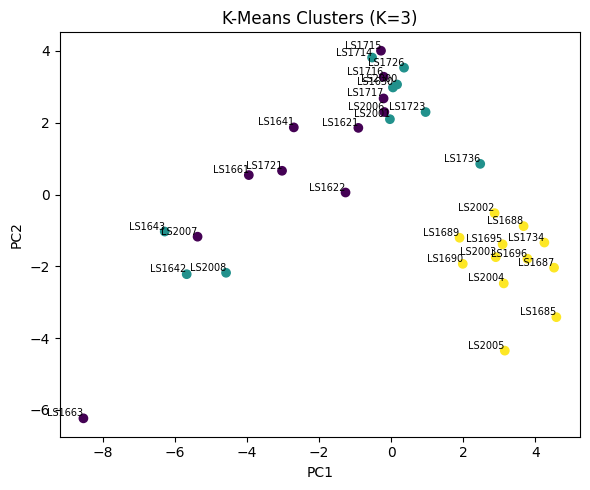

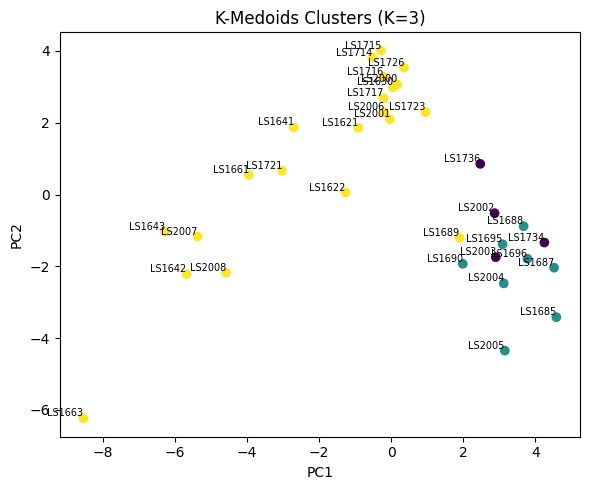

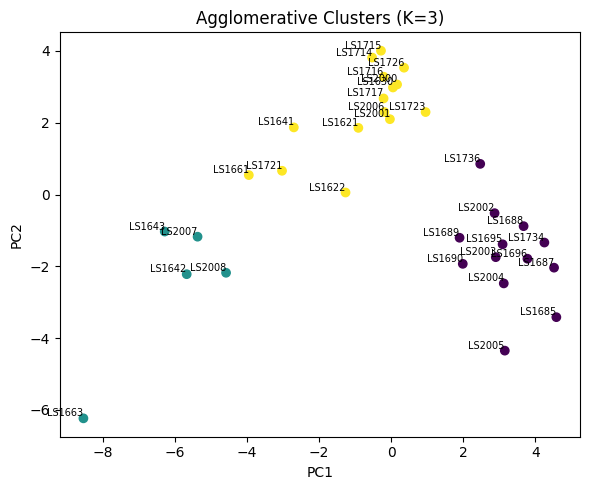

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]
numeric_df = df.select_dtypes(include=[np.number])
features = numeric_df.iloc[:, :-1]
## drop output column
try:
    features = features.drop(columns=['output'])
except KeyError:
    pass    
# Standardize features
X_scaled = StandardScaler().fit_transform(features)

# PCA for visualization
X_pca2 = PCA(n_components=2, random_state=0).fit_transform(X_scaled)

# Number of clusters
K = 3

# K-Means
labels_km = KMeans(n_clusters=K, random_state=0).fit_predict(X_scaled)

# K-Medoids (PAM implementation)
def kmedoids_pam(X, K, max_iter=100):
    n = X.shape[0]
    medoids = np.random.choice(n, K, replace=False)
    for _ in range(max_iter):
        # Assign to nearest medoid
        D = pairwise_distances(X, X[medoids])
        labels = np.argmin(D, axis=1)
        new_medoids = medoids.copy()
        # Update medoids for each cluster
        for i in range(K):
            cluster_idx = np.where(labels == i)[0]
            if len(cluster_idx) == 0:
                continue
            intra_D = pairwise_distances(X[cluster_idx], X[cluster_idx])
            total_dist = intra_D.sum(axis=1)
            new_medoids[i] = cluster_idx[np.argmin(total_dist)]
        if np.array_equal(new_medoids, medoids):
            break
        medoids = new_medoids
    # Final assignment
    D = pairwise_distances(X, X[medoids])
    return np.argmin(D, axis=1)

labels_kmed = kmedoids_pam(X_scaled, K)

# Agglomerative Clustering
labels_hc = AgglomerativeClustering(n_clusters=K, linkage='ward').fit_predict(X_scaled)

# Results table
results = pd.DataFrame({
    'Sample': sample_names,
    'KMeans': labels_km,
    'KMedoids': labels_kmed,
    'Agglomerative': labels_hc
})


# Plotting helper
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    for i, name in enumerate(sample_names):
        plt.text(X[i,0], X[i,1], name, fontsize=7, ha='right', va='bottom')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.tight_layout()

# Plots
plot_clusters(X_pca2, labels_km, 'K-Means Clusters (K=3)')
plot_clusters(X_pca2, labels_kmed, 'K-Medoids Clusters (K=3)')
plot_clusters(X_pca2, labels_hc, 'Agglomerative Clusters (K=3)')
plt.show()

In [3]:
import re

lsd=["Strech Threshold - default is 1600 for carbonyl stretch",
                "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7",
                "Bending Threshold - default is 1600 "]
for question in lsd:
    if re.search(r'threshold', question.lower(), re.IGNORECASE):
        continue
    else: 
        print('x')

x


In [3]:
os.chdir(r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers')
df = pd.read_feather('MD-25_optimized.feather')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,34.0,NaN,NaN,NaN,-3.5495,-5.0962,0.4412,6.2262,204.861,252.49,-0.58832,-0.306992,-0.354133,16.1270,0.0006,-0.02,0.00,-0.14,-0.01,0.00,-0.08,-0.01,0.00,-0.06,-0.02,0.00,-0.10,0.00,0.00,0.00,0.00,-0.01,0.01,0.01,-0.02,0.04,0.00,-0.03,-0.02,0.02,0.06,0.22,0.00,0.02,0.00,0.00,0.04,-0.01,0.01,0.00,0.05,0.01,0.00,0.04,0.02,0.00,0.10,0.02,0.00,0.10,0.01,0.00,0.04,0.00,0.00,-0.02,0.00,0.00,-0.02,0.02,0.04,0.22,-0.01,0.07,0.02,0.03,0.11,0.39,0.00,-0.02,0.01,-0.02,-0.04,-0.22,0.00,0.05,-0.04,0.02,0.00,0.10,0.03,0.00,0.15,0.03,0.00,0.15,0.01,0.00,0.04,-0.01,0.00,-0.07,-0.02,-0.06,-0.21,0.04,0.08,0.40,0.00,-0.03,0.01,-0.04,-0.11,-0.39,-0.04,-0.07,-0.39
1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49254,0.111552,0.144743,28.0790,0.0021,-0.12,0.01,-0.03,-0.07,-0.02,-0.01,-0.06,-0.08,0.01,-0.10,-0.11,0.02,0.00,-0.11,0.03,0.00,-0.17,0.04,-0.02,-0.18,0.04,0.03,-0.17,0.05,0.10,0.01,-0.01,-0.01,-0.07,0.02,0.01,-0.19,0.05,0.05,-0.08,0.03,0.05,-0.02,0.01,0.11,0.01,0.01,0.11,0.08,-0.01,0.05,0.11,-0.03,-0.01,0.08,-0.03,-0.01,0.02,-0.01,0.09,0.13,-0.04,0.07,-0.24,0.02,0.19,-0.04,-0.01,-0.03,0.19,-0.04,-0.12,-0.01,0.02,-0.05,-0.24,0.11,0.09,-0.11,0.04,0.16,-0.01,0.02,0.16,0.10,-0.01,0.05,0.16,-0.05,-0.05,0.11,-0.05,-0.14,0.12,-0.01,0.17,0.19,-0.06,-0.04,0.29,-0.06,-0.23,0.16,-0.01,-0.21,-0.06,0.04
2,O,3.130753,2.772714,0.002761,NaN,NaN,NaN,NaN,NaN,NaN,-0.36770,-0.090290,-0.132874,41.0538,0.0050,-0.02,-0.01,-0.08,-0.01,0.00,0.00,0.01,0.01,0.10,0.01,0.01,0.08,0.01,0.01,0.19,0.01,0.01,0.19,0.01,0.00,0.23,0.00,-0.03,0.15,0.02,0.01,-0.02,0.05,0.04,0.06,0.06,0.08,0.14,0.01,0.01,0.21,-0.01,0.00,0.09,-0.02,-0.01,0.06,-0.05,-0.01,-0.09,-0.06,-0.02,-0.21,-0.05,-0.02,-0.17,-0.02,-0.01,-0.02,0.00,-0.04,-0.15,0.08,0.12,0.19,0.01,0.02,0.01,0.00,-0.05,-0.19,0.05,0.02,0.02,0.09,0.10,0.11,0.01,0.01,0.26,-0.01,0.00,0.15,-0.06,-0.02,-0.11,-0.08,-0.03,-0.33,-0.06,-0.02,-0.26,0.03,-0.02,-0.11,-0.02,-0.06,-0.21,-0.01,-0.09,-0.29,0.04,-0.04,-0.14,0.08,0.05,0.07
3,C,2.519342,1.722728,0.112652,NaN,NaN,NaN,NaN,NaN,NaN,0.22967,0.045607,0.105880,53.1047,0.0054,-0.09,-0.02,-0.06,-0.05,-0.04,-0.02,-0.04,-0.09,0.01,-0.07,-0.10,0.02,0.00,-0.11,0.01,0.00,-0.13,0.02,0.02,-0.21,0.25,0.00,-0.31,-0.15,-0.09,0.07,-0.06,-0.02,0.13,-0.04,-0.03,0.19,-0.07,0.03,-0.09,0.00,0.03,-0.04,0.00,0.08,-0.02,0.03,0.08,0.02,0.04,0.04,0.05,0.03,0.00,0.02,0.01,-0.01,-0.02,-0.01,-0.08,-0.01,-0.01,-0.05,0.39,0.11,-0.16,0.09,-0.10,0.00,-0.03,0.05,0.06,0.10,0.01,-0.02,0.28,-0.31,0.06,-0.10,0.01,0.11,-0.04,0.03,0.12,0.04,0.06,0.05,0.08,0.05,-0.03,0.04,0.00,0.08,0.03,0.06,-0.14,-0.05,-0.03,0.01,-0.09,0.08,0.15,0.01,0.11,0.12,0.14,0.03
4,C,1.090996,1.651325,0.363223,NaN,NaN,NaN,NaN,NaN,NaN,0.24567,0.062148,0.115415,92.9320,0.0253,-0.05,0.00,0.11,-0.05,0.00,0.06,-0.06,0.00,-0.01,-0.08,0.00,-0.10,-0.05,0.00,0.02,-0.06,-0.02,-0.11,-0.10,-0.02,-0.16,-0.13,-0.01,-0.13,0.08,-0.02,-0.11,0.06,-0.04,-0.18,0.06,-0.04,-0.17,-0.03,0.00,0.15,-0.04,0.00,0.11,-0.03,0.00,0.12,-0.06,0.00,-0.02,-0.08,0.00,-0.14,-0.08,0.00,-0.10,-0.05,0.00,0.03,0.11,0.03,0.08,0.09,-0.04,-0.16,0.08,-0.03,-0.16,0.13,0.06,0.19,0.08,-0.02,-0.11,0.09,-0.04,-0.14,-0.03,0.00,0.16,-0.02,0.00,0.20,-0.06,0.00,-0.03,-0.10,0.01,-0.26,-0.09,0.00,-0.17,0.11,0.03,0.07,0.13,0.05,0.16,0.16,0.10,0.35,0.12,0.05,0.14,0.07,-0.04,-0.17


In [4]:
m=Molecules(r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers')

Molecules Loaded: ['HHQ_optimized.feather', 'MD-106_optimized.feather', 'MD-108_optimized.feather', 'MD-124_optimized.feather', 'MD-125_optimized.feather', 'MD-24_optimized.feather', 'MD-25_optimized.feather', 'MD-28_optimized.feather', 'MD-37_optimized.feather', 'MD-38_optimized.feather', 'MD-41_optimized.feather', 'MD-42_optimized.feather', 'MD-48_target.feather', 'MD-61_optimized.feather', 'MD-66_optimized.feather', 'MD-68_optimized.feather', 'MD-71_optimized.feather', 'MD-74_optimized.feather', 'MD-75_optimized.feather', 'MD-77_optimized.feather', 'MD-83_optimized.feather', 'MD-87_optimized.feather', 'ME-10_optimized.feather', 'ME-17_optimized.feather', 'ME-18_optimized.feather', 'ME-1_optimized.feather', 'ME-22_optimized.feather', 'ME-27_optimized.feather', 'ME-2_optimized.feather', 'ME-5_optimized.feather', 'ME-7_optimized.feather', 'ME-8_optimized.feather', 'PQS_optimized.feather'] Failed Molecules: []


In [6]:
m.molecules[6].xyz_df

,atom,x,y,z
0,O,3.130753,2.772714,0.002761
1,C,2.519342,1.722728,0.112652
2,C,1.090996,1.651325,0.363223
3,H,0.547207,2.580431,0.458519
4,C,0.438942,0.470830,0.476840
5,C,-1.042087,0.361156,0.681827
6,H,-1.423587,1.320821,1.029000
7,H,-1.258496,-0.372482,1.464599
8,C,-4.068643,0.996029,-0.522982
9,C,-3.263484,-0.131175,-0.385515


C:\Users\edens\AppData\Local\Temp\ipykernel_25100\3026575405.py:44: UserWarning:

Glyph 8314 (\N{SUPERSCRIPT PLUS SIGN}) missing from font(s) Arial.

c:\Users\edens\anaconda3\envs\labenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8314 (\N{SUPERSCRIPT PLUS SIGN}) missing from font(s) Arial.



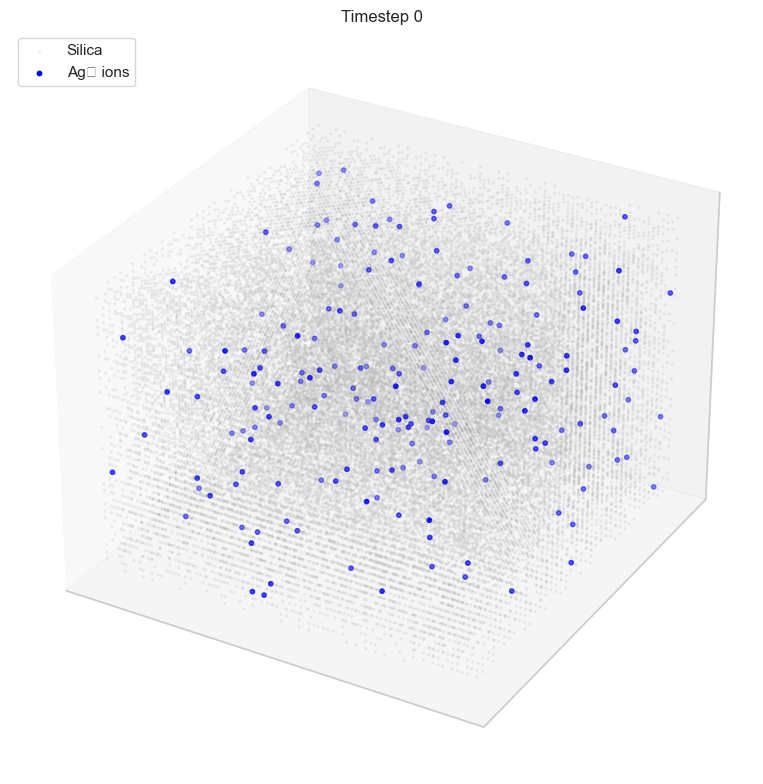

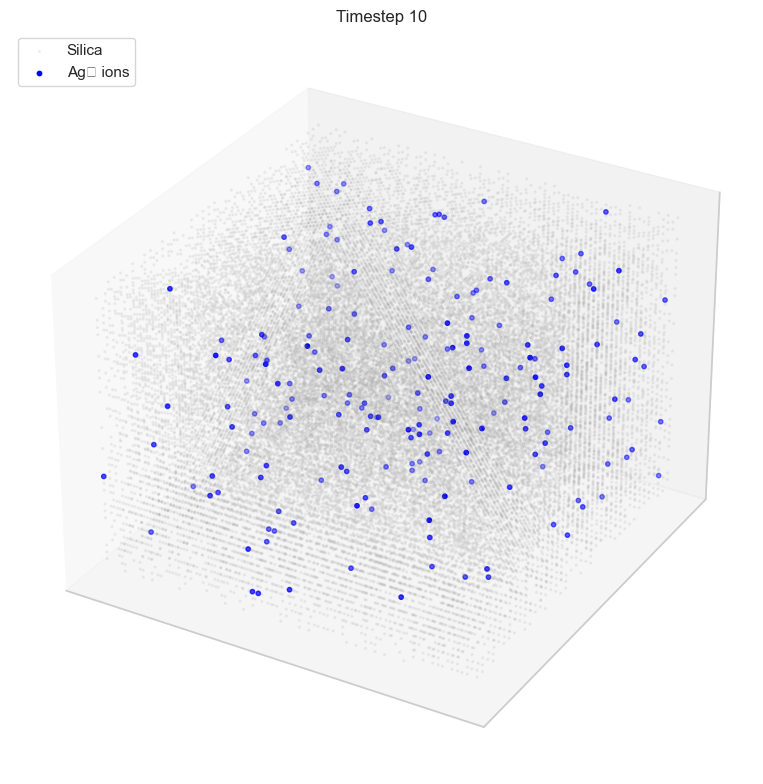

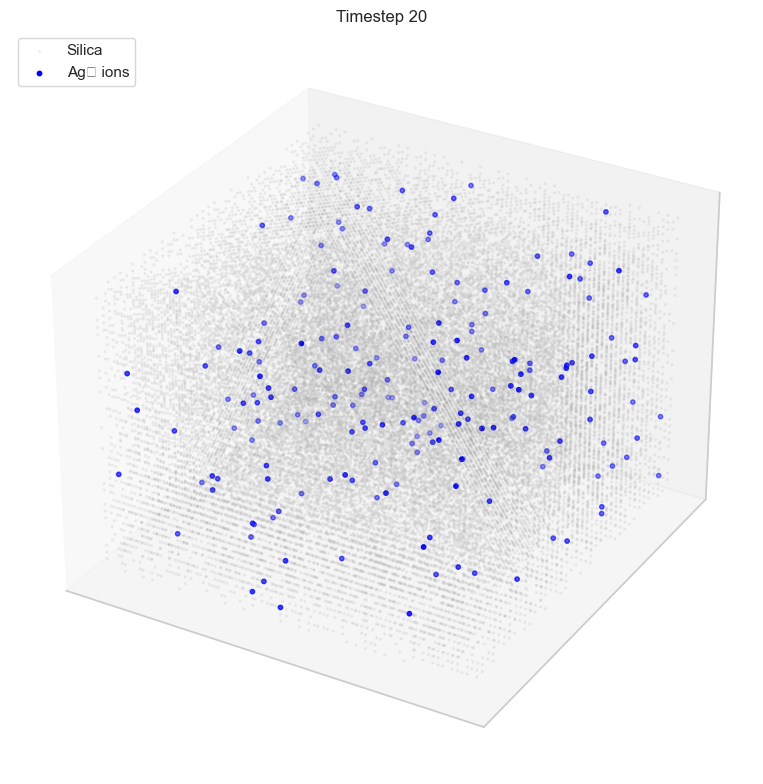

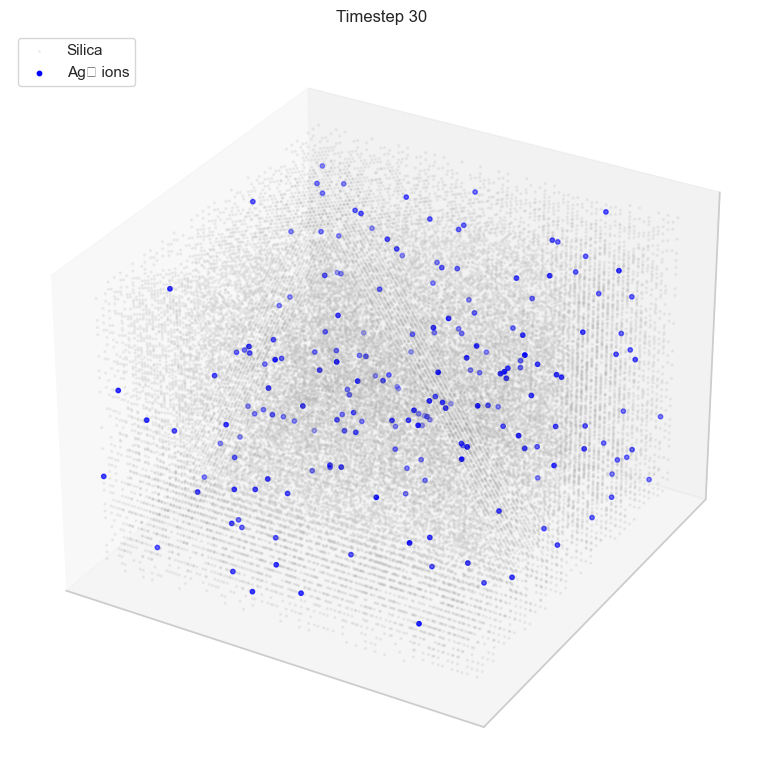

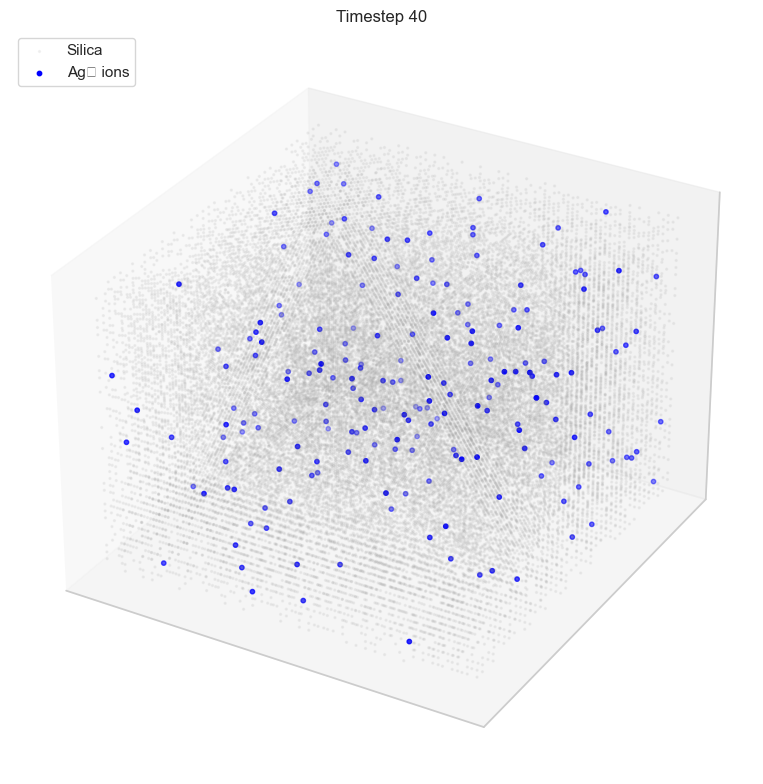

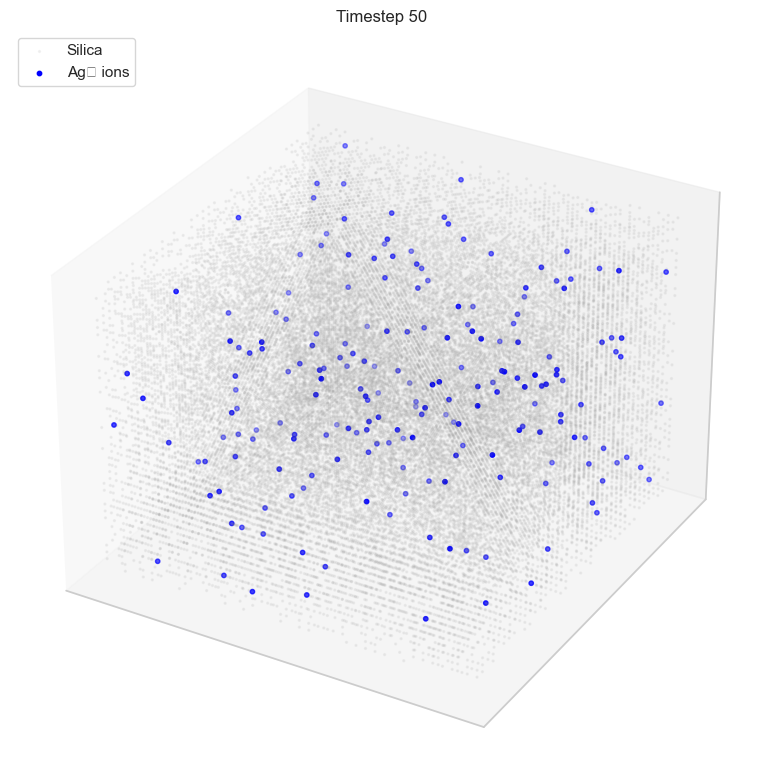

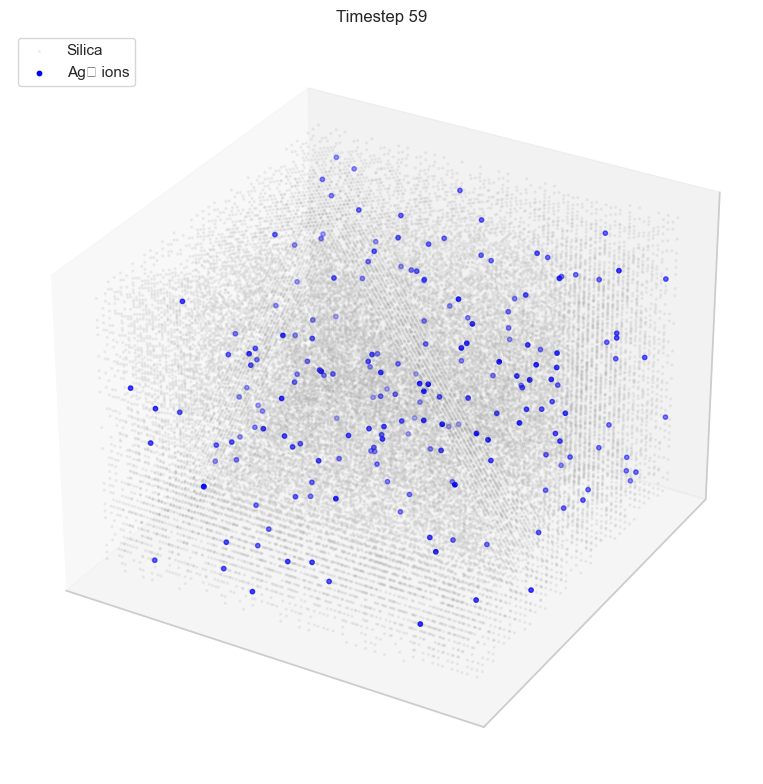

Simulation complete!


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
size = 40  # grid dimension (cubic)
pore_fraction = 0.5
num_ions = 200
nucleation_thresh = 3
timesteps = 60

# 1. Generate 3D porous silica (random percolation)
np.random.seed(42)
matrix = (np.random.rand(size, size, size) < pore_fraction)  # True = pore, False = silica

# 2. Place silver ions randomly in pores
pore_indices = np.argwhere(matrix)
init_indices = np.random.choice(len(pore_indices), num_ions, replace=False)
ion_positions = [tuple(pos) for pos in pore_indices[init_indices]]

# 3. Nucleation/growth bookkeeping
np_sites = {}  # {(i, j, k): num_ions}

def plot_system(matrix, ions, np_sites, t, show_silica_shell=True):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'Timestep {t}')
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    # Silica matrix (transparent shell)
    if show_silica_shell:
        silica = np.argwhere(~matrix)
        if len(silica):
            ax.scatter(*silica.T, color='gray', s=2, alpha=0.08, marker='o', label='Silica')
    # Free ions
    if len(ions):
        ions_arr = np.array(ions)
        ax.scatter(ions_arr[:,0], ions_arr[:,1], ions_arr[:,2], color='blue', s=10, marker='o', label='Ag⁺ ions')
    # NPs
    if len(np_sites):
        nps = np.array(list(np_sites.keys()))
        sizes = np.array(list(np_sites.values()))
        ax.scatter(nps[:,0], nps[:,1], nps[:,2], color='red', s=20 + 10*sizes, marker='o', label='Ag NPs')
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# 4. Simulation loop
for t in range(timesteps):
    # Diffuse ions
    new_ions = []
    for ion in ion_positions:
        i, j, k = ion
        # Pick random neighbor (6-connectivity)
        neighbors = [(i+1,j,k),(i-1,j,k),(i,j+1,k),(i,j-1,k),(i,j,k+1),(i,j,k-1)]
        np.random.shuffle(neighbors)
        moved = False
        for ni, nj, nk in neighbors:
            if 0 <= ni < size and 0 <= nj < size and 0 <= nk < size and matrix[ni, nj, nk]:
                # If there's already a NP, join it
                if (ni, nj, nk) in np_sites:
                    np_sites[(ni, nj, nk)] += 1
                    moved = True
                else:
                    new_ions.append((ni, nj, nk))
                    moved = True
                break
        if not moved:
            new_ions.append((i, j, k))  # didn't move

    # Nucleation: Check for clustering at each site
    positions, counts = np.unique(new_ions, axis=0, return_counts=True)
    to_remove = set()
    for pos, count in zip(positions, counts):
        if count >= nucleation_thresh:
            pos_tup = tuple(pos)
            np_sites[pos_tup] = count
            to_remove.add(pos_tup)
    # Remove nucleated ions from free pool
    ion_positions = [ion for ion in new_ions if ion not in to_remove]

    # Visualize every few steps
    if t % 10 == 0 or t == timesteps-1:
        plot_system(matrix, ion_positions, np_sites, t)

print('Simulation complete!')


In [ ]:
import ase
from ase.build import fcc111
from ase.io import write
import os
os.chdir(r'C:\Users\edens\Desktop\lmp_test')
# צור חלקיק זהב FCC גדול
a = 4.0782  # תא יחידה של זהב
slab = fcc111('Au', size=(10,10,10), a=a, vacuum=10.0, orthogonal=True)

# חתוך לצורת ביפירמידה (פשטני):
atoms = slab[[atom.position[2] > a*5 - abs(atom.position[0] - a*5) for atom in slab]]
write('bipyramid.xyz', atoms)


c:\Users\edens\anaconda3\envs\labenv\lib\site-packages\ase\io\extxyz.py:302: UserWarning:

Skipping unhashable information adsorbate_info

